# 10 Problemset 

**Instructions:** Start by loading the necessary libraries as follows:



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline

## 10.1 Spline approximation

Explain the following piece of code using the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html#scipy.interpolate.UnivariateSpline) and answer the following questions for each of the splines constructed in the code:

*   What is the spline degree?
*   What is the number of knots and number of grid points?
*   Is the spline interpolatory (i.e., does it pass through the data points)?
*   What smoothing parameter is used, and what does this mean?

ANS:

number of grid points = 50 (sample points)

Curve 1: degree = 1, number of knots = 50, interpolatory (through all points), smooth factor = 0 [Explanation: the spline is a piecewise concatenation of straight lines passing through all grid points]

Curve 2: degree = 3 (default), number of knots = 2 (starting point and ending point), non-iterpolatory, smooth factor = 50 [Explanation: the spline is a smooth cubic curve with default tolerance on the fit of the grid points, which would be a good value if the standard deviation of y equals the inverse of the weight. In this case, $sd(y)=0.1$, which is far-fetched from the uniform rate, hence it is not a good fit]

Curve 3: degree = 3 (default), number of knots = 5, smooth factor = 0.5 [Explaination: the smooth factor is specified as 0.5, meaning: $\sum_{i}(w_i*(y_i-spl(x_i)))^2<=0.5$. It could be observed that the curve fit the grid points more]

Num of grid point: 50
Curve 1: num of knots: 50
Curve 2: num of knots: 2
Curve 3: num of knots: 5


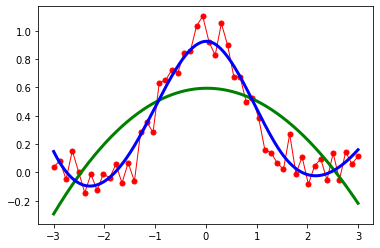

In [2]:
rng = np.random.default_rng()
x = np.linspace(-3, 3, 50)
print('Num of grid point:', len(x))
y = np.exp(-x**2) + 0.1 * rng.standard_normal(50)
xs = np.linspace(-3, 3, 1000)

plt.plot(x, y, 'ro', ms=5)

spl = UnivariateSpline(x, y, k=1, s=0)
print('Curve 1: num of knots:', len(spl.get_knots()))
plt.plot(xs, spl(xs), 'r', lw=1)

spl = UnivariateSpline(x, y)
print('Curve 2: num of knots:', len(spl.get_knots()))
plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.5)
print('Curve 3: num of knots:', len(spl.get_knots()))
plt.plot(xs, spl(xs), 'b', lw=3)

## 10.2 Spline approximation using neural networks

ReLU networks realize piece-wise linear functions, i.e., splines of degree 1. Similarly, networks with power unit activation $(x)_+^k$ realize piecewise polynomials of higher degree. Based on these observations, implement the spline approximation in Problem 10.1 using neural networks and compare the performance.

*Hint.* Power unit activations can be implemented as follows (here with degree 3):

Curve 1: set degree = 1 and epoch to a high value will yield curve 1

2/2 [==============================] - 0s 926us/step


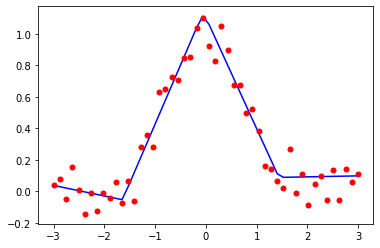

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1)),
  tf.keras.layers.Dense(500, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.)),
  tf.keras.layers.Activation(lambda x: tf.math.pow(x, tf.constant([1.]))),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss = tf.keras.losses.MeanSquaredError())
model.fit(x, y, epochs=10000, verbose = 0)

plt.plot(x, model.predict(x), 'b')
plt.plot(x, y, 'ro', ms=5)
plt.show()

Curve 2: setting degree = 3 and epoch to a small value will yield curve 2

2/2 [==============================] - 0s 2ms/step


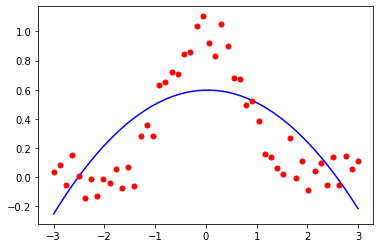

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1)),
  tf.keras.layers.Dense(500, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.)),
  tf.keras.layers.Activation(lambda x: tf.math.pow(x, tf.constant([3.]))),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss = tf.keras.losses.MeanSquaredError())
model.fit(x, y, epochs=200, verbose = 0)

plt.plot(x, model.predict(x), 'b')
plt.plot(x, y, 'ro', ms=5)
plt.show()

Curve 3: setting degree = 3 and epoch to a high value will yield curve 3

2/2 [==============================] - 0s 3ms/step


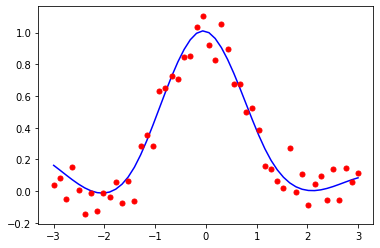

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1)),
  tf.keras.layers.Dense(500, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.)),
  tf.keras.layers.Activation(lambda x: tf.math.pow(x, tf.constant([3.]))),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss = tf.keras.losses.MeanSquaredError())
model.fit(x, y, epochs=10000, verbose = 0)

plt.plot(x, model.predict(x), 'b')
plt.plot(x, y, 'ro', ms=5)
plt.show()

Conclusion: same as 10.1, we have curve 3 is the best fit, followed by curve 1 in which the degree used is limited, then by curve 2 in which the model lacks requireents on the accuracy